# Chapter 1: Software and packages


In [4]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from copy import deepcopy

# Chapter 2: Basic Operation of images


In [7]:
#2.1 importing, drawing and displaying
img=cv2.imread('itadori.png',0)
img

array([[ 21,  21,  21, ..., 107, 107, 107],
       [ 21,  21,  21, ..., 107, 107, 107],
       [ 21,  21,  21, ..., 107, 107, 107],
       ...,
       [ 34,  34,  34, ...,  46,  46,  46],
       [ 34,  34,  34, ...,  46,  46,  46],
       [ 34,  34,  34, ...,  46,  46,  46]], dtype=uint8)

In [8]:
img[5,3]==21

True

In [4]:
def wind(image) : 
    cv2.namedWindow('image',cv2.WINDOW_NORMAL)
    cv2.imshow('image',image)
    cv2.waitKey(2000)
    cv2.destroyAllWindows()

In [10]:
wind(img)

In [11]:
imgcol=cv2.imread('itadori.png',1)
wind(imgcol)

In [12]:
imgcol1=deepcopy(imgcol)
circle=cv2.circle(imgcol1,(100,300),100,(0,255),10)
wind(circle)

In [14]:
imgN1=cv2.imread('itadori1.png',1)
wind(imgN1)

In [ ]:
imgN=deepcopy(imgN1)
def click2circle(event,x,y,flags,param):    
    if event==cv2.EVENT_LBUTTONDBLCLK:
        cv2.circle(imgN,(x,y),50,(255,0,0),10)
    
cv2.namedWindow('Differences', cv2.WINDOW_NORMAL)
cv2.setMouseCallback('Differences',click2circle)

while True:
    cv2.imshow('Differences',imgN)
    a=cv2.waitKey(2000)
    print('2seconds')
    if a==27:
        break
cv2.destroyAllWindows()

In [ ]:
#2.2 spliting channel,map algebra

In [15]:
wind(imgcol)


In [ ]:
b,g,r=cv2.split(imgcol)
wind(r-g)
imgcol2=cv2.merge((b,g,r))
wind(imgcol2)

In [ ]:
#2.3 resizing,cropping and exporting


In [ ]:
imgres=cv2.resize(imgcol,dsize=None, fx=0.6, fy=.6, interpolation=cv2.INTER_CUBIC)


In [ ]:
cv2.imshow('image',imgres)
cv2.waitKey(2000)
cv2.destroyAllWindows()

In [ ]:
cropped=imgres[100:300,50:300]
wind(cropped)

# chapter 3: Geometric operation on images

In [7]:
#3.1 image gradients
bike=cv2.imread('bike.png',0)
wind(bike)

In [8]:
sobelx=cv2.Sobel(bike,cv2.CV_8U,1,0,ksize=3)

In [9]:
wind(sobelx)

In [10]:
laplacian=cv2.Laplacian(bike,cv2.CV_8U)
wind(laplacian)

In [11]:
#3.2 Edge and Feature detection

In [12]:
edges=cv2.Canny(bike,250,300)
wind(edges)

In [13]:
petals=cv2.imread('flower.jpg',1)
wind(petals)

In [14]:
edges=cv2.Canny(petals,100,400)
wind(edges)

In [15]:
lines=cv2.HoughLines(edges,5,5*np.pi/180,200)

In [16]:
lines


array([[[ 1.0500000e+02,  2.3561945e+00]],

       [[-5.2000000e+02,  2.7052603e+00]],

       [[ 1.3000000e+03,  1.6580627e+00]],

       ...,

       [[ 2.2300000e+03,  6.1086524e-01]],

       [[ 2.7200000e+03,  7.8539813e-01]],

       [[ 2.3800000e+03,  1.2217305e+00]]], dtype=float32)

In [18]:
for iterator in lines:
    rho=iterator[0][0]
    theta=iterator[0][1]
    a=np.cos(theta)
    b=np.sin(theta)
    x0=a*rho
    y0=b*rho
    x1=int(x0+1000*(-b))
    y1=int(y0+1000*(a))
    x2=int(x0-1000*(-b))
    y2=int(y0-1000*(a))
    cv2.line(petals,(x1,y1),(x2,y2),(0,0,255),2)

In [19]:
wind(petals)

In [20]:
#3.3 A simple geocomputation application

In [21]:
imgN1=cv2.imread('itadori1.png',1)
wind(imgN1)

In [22]:
diffs=np.array([[50,100],[100,233],[100,156],[250,200]])

In [26]:
def euclid(x1,x2,y1,y2):
    return int(np.sqrt((x1-x2)**2+(y1-y2)**2))

In [32]:
imgN=deepcopy(imgN1)
def click2circle(event,x,y,flags,param):
    if event==cv2.EVENT_LBUTTONDBLCLK:
        for diff in diffs:
            if euclid(x,diff[0],y,diff[1])<15:
                cv2.circle(imgN,(x,y),50,(255,0,0),4)

cv2.namedWindow("differences",cv2.WINDOW_NORMAL)
cv2.setMouseCallback("differences", click2circle)

while True:
    cv2.imshow("differences",imgN)
    a=cv2.waitKey(1000)
    print("1 second")
      
    if a==27:
        break
cv2.destroyAllWindows()

1 second
1 second
1 second
1 second
1 second
1 second
1 second
1 second
1 second


# Chapter 4: Radiometric operations on images

In [33]:
#4.1 Image colourspace and thresholding

In [35]:
hsv=cv2.cvtColor(imgN1,cv2.COLOR_BGR2HSV)
wind(hsv)

In [36]:
gray=cv2.cvtColor(imgN1,cv2.COLOR_BGR2GRAY)
wind(gray)


In [40]:
r,t=cv2.threshold(gray,90,254,cv2.THRESH_BINARY)
r

90.0

In [45]:
t
wind(t)

In [60]:
#4.2 Image histogram


In [66]:
tiger=cv2.imread('tiger.jpg',0)
wind(tiger)

In [62]:
hist=cv2.calcHist([tiger],[0],None,[256],[0,256])
xaxis=np.arange(256).reshape(256,1)
histogram=np.hstack((xaxis,hist)).astype(int)

<function matplotlib.pyplot.show(close=None, block=None)>

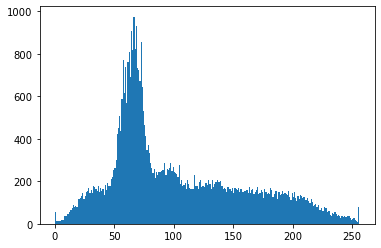

In [67]:
plt.hist(tiger.flatten(),256,[0,256])
plt.show

In [72]:
equa=cv2.equalizeHist(tiger)
wind(equa)

In [73]:
res=np.hstack((tiger,equa))
wind(res)

In [ ]:
#4.3 Convolution Based Opertions

In [74]:
blur=cv2.blur(tiger,(7,7))
wind(blur)

In [76]:
blurG=cv2.GaussianBlur(tiger,(9,11),0)
wind(blurG)

In [78]:
res1=np.hstack((tiger,blurG))
wind(res1)

In [ ]:
#4.4 k-means classification

In [79]:
img=cv2.imread("butterfly.jpg",1)
wind(img)

In [86]:
imgCL=np.float32(img.reshape((-1,3)))
wind(imgCL)

In [89]:
imgCL=np.float32(img.reshape((-1,3)))
criteria=(cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER,15,1.0)
K=4
ret,lab,center=cv2.kmeans(imgCL,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
#center=np.uint8(center)
#res=center[lab.flatten()]
#res2=res.reshape((img.shape))
#wind(res2)

# # Chapter 5: An Earth Observation example

In [2]:
pathB="C:/Users/Acer/Documents/1OpenCV course/code/before/"
pathA="C:/Users/Acer/Documents/1OpenCV course/code/after/"

In [6]:
BEF=[]
AFT=[]
for i in range(1,8):
    BEF.append(cv2.imread(pathB+"B"+str(i)+".tif",0)[4200:4700,2900:3500])
    AFT.append(cv2.imread(pathA+"B"+str(i)+".tif",0)[4200:4700,2900:3500])

TypeError: 'NoneType' object is not subscriptable

In [6]:
BEF32=[]
AFT32=[]
for i in range(7):
    BEF32.append(np.float32(cv2.equalizeHist(BEF[i])))
    AFT32.append(np.float32(cv2.equalizeHist(AFT[i])))

IndexError: list index out of range

In [7]:
before=cv2.merge((BEF32[0],BEF32[1],BEF32[2],BEF32[3],BEF32[4],BEF32[5],BEF32[6]))

IndexError: list index out of range

In [1]:
beforeReady=before.reshape((-1,7))
criteria=(cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER,30,1)
ret,label,center=cv2.kmeans(beforeReady,6,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
center=np.uint8(center)
res=center[label.flatten()]
res2=res.reshape((before.shape))

NameError: name 'before' is not defined

In [9]:
beforeF=deepcopy(res2[:][:,:,:3])

NameError: name 'res2' is not defined

In [10]:
wind(beforeF)

NameError: name 'beforeF' is not defined